In [503]:
%matplotlib inline

# Filtrage Numérique - Homework 2
- - -
# Luc Deneire


## Polytech Nice Sophia

- - -

## Identification de l'Élève

    Nom: DE SOUZA ABDALAH
    Prénom: Lucas
    Id: dl911568

- - -

# Filtrage numérique


Vous êtes  ingénieur audio, et vous recevez un multiplex audio formé de 12 canaux.  Chaque canal contient un signal codé en '.wav' à 44100 ksps, et donc de largeur 44100 Hz, et la fréquence centrale de chacune des bandes est de $k$ 44100 kHz, où $k=[0 .. 11]$.  La largeur de bande totale est donc de 1036350/2 kHz.
On vous demande de récupérer le canal $x$, en utilisant, outre les techniques de filtrage numérique, un banc de filtres.

Vous choisirez $x$ comme étant le jour de votre naissance modulo 9 (ou modulo 9 +1), de telle sorte que le numéro de canal soit impair.




Dans un deuxième temps, vous remplacerez échangerez les contenus du canal $x$ et du  canal $y=10$.  Pour ce faire, vous utiliserez également un banc de filtres polyphases.

Vous rendrez un Notebook jupyter, comprenant les différents codes, avec :
<ol>

<li> la démodulation par filtrage ``simple'' ;
<li> la démodulation par filtrage polyphase ;
<li> une instruction qui ``joue'' la musique du canal $x$ ;
<li> le morceau de code qui démodule et ``joue'' la musique du canal 10 ;
<li> le code qui échange les canaux $x$ et 10.
</ol>


## Sources et Aide

1. La syntaxe **markdown** - [markdown](https://daringfireball.net/projects/markdown/basics)

2. La syntaxe **python** - [python](https://docs.python.org/fr/3/tutorial/index.html)

3. La bibliothèque **numpy** - [numpy](https://docs.scipy.org/doc/#)

4. La bibliothèque **matplotlib** - [matplotlib](https://matplotlib.org/)

5. La bibliothèque **scipy.signal** - [scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html)

6. La bibliothèque **Ipython.display** - [Ipython.display](https://musicinformationretrieval.com/ipython_audio.html)

7. La bibliothèque **warnings** - [warnings](https://docs.python.org/3/library/warnings.html)


<div class="alert alert-warning">
    
**Tip:** indiquez ici les sources de recherche pour faciliter les questions.

</div>

- - -

In [504]:
# ---------------------------
# Importer les bibliothèques
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import IPython.display as ipd
# ---------------------------

#### Work with short and easier syntax

In [505]:
# ---------------------------
# Definitions for make it easier:
pi, cos, sin, log10, exp  = np.pi, np.cos, np.sin, np.log10, np.exp
# Array 
linspace, arange, array, norm, zeros, ones= np.linspace, np.arange, np.array, np.linalg.norm, np.zeros, np.ones
# ---------------------------

#### My function to plot and stemplot

In [506]:
def myplot(y, x='none', title='title',x_axis='x', y_axis='y', label='none', stemplot='none'):

## ------------------------------------------------------------------------------------
#     myplot(y, x, title,x_axis, y_axis, stemplot)
#         This function receive a 'signal' multiplexed on time
#         with sampling 'sr' and the channel wich desire extract
#
#         [in]:
#             y: y axis values;
#             x: x axis values; 
#             title: title of the plot;
#             x_axis: axis name; 
#             y_axis: axis name;
#             label: label name on the legend (if differente of 'none')
#             stemplot: show or not the discret plot.
#            
#         [out]: 
#             a plot according with entries
## ------------------------------------------------------------------------------------

#     -- Remove the warning about the disagreement between Numpy and native python when 
#     -- when you compare a strings to numpy's numeric types
#     https://stackoverflow.com/questions/40659212/futurewarning-elementwise-comparison-failed-returning-scalar-but-in-the-futur
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning) 
#     --
    
    # Default value for axis 'x' - the number of samples
    if x == 'none':
        x = np.linspace(1, y.size, y.size);
    
    # Define a stem and normal plot with a pre-defined size
    SizePlotx = 18; SizePloty = 3; # Box size
    plt.figure(figsize=(SizePlotx, SizePloty)) # Define the box size
    
    # Name definitions
    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    
    # Show or not Stemplot
    if stemplot == 'true':
        plt.stem(x,y,linefmt='grey', markerfmt='', # Stem plot
             bottom=0, use_line_collection=True)
    
    # Show or not legend
    if label != 'none':
        plt.plot(x,y,'m',label=label) # Plot
    else:
        plt.plot(x,y,'m') # Plot

    # Output the graph
    plt.grid('on') # Turn on the grid
    
    # Made a comment to use with the scpectre plot using xticks, 
#     plt.show() # Show the image 

#### Centering and Scaling
    Normalization to work with a signal with zero mean and amplitude limited between [-0.5, 0.5].
    
$$
y' = \dfrac{y - \mu(y)}{\sigma(y)} \\
y'' = 0.5 \dfrac{y'}{max(|y'|)}
$$

In [507]:
def center_scale(x):

## ------------------------------------------------------------------------------------
#     center_scale(x)
#         This function receive a 'x' and return a version centered and scaled
#         with zero mean and unit standard deviation. 
#
#         [in]:
#             x: x values.
#            
#         [out]: 
#             y: x centered and scaled.
## ------------------------------------------------------------------------------------
    
    import numpy as np

    x = (x - np.mean(x))/ (np.std(x)); 
    y = x/(2*max(abs(x)));

    return y

#### Modulo9 of a number

In [508]:
def mod9_odd(x):
## ------------------------------------------------------------------------------------
#     mod9_odd(x)
#         This function receive a number and compute the
#         modulo9 of a number and returns it if odd.
#         If even, return modulo9 + 1
# 
#         [in]: 
#             x: original signal;
# 
#         [out]: 
#             Returns the modulo9
## ------------------------------------------------------------------------------------
    if (x%9)%2 == 0: # Even
        return x%9 + 1
    else: # Odd
        return x%9 

#### Uplsampling

In [509]:
def upsampling(x, M, L) :
## ------------------------------------------------------------------------------------
#     upsampling(x, M, L) :
#         Upsampling a signal
#     [in]:
#         x: signal to upsample
#         M: Upsampling parameter  
#         L: the size that y will be 
# 
#         [out]: x_sampled: x_upsampled by M and L parameters
## ------------------------------------------------------------------------------------
 
    x_sampled=np.zeros(L) # Creating a array to make the upsampling the band of x
    x_sampled[0::2*M]=x[0:L//(2*M)]*M # Upsampling
    return x_sampled

- - - 
- - -
- - -

### 0. Intro

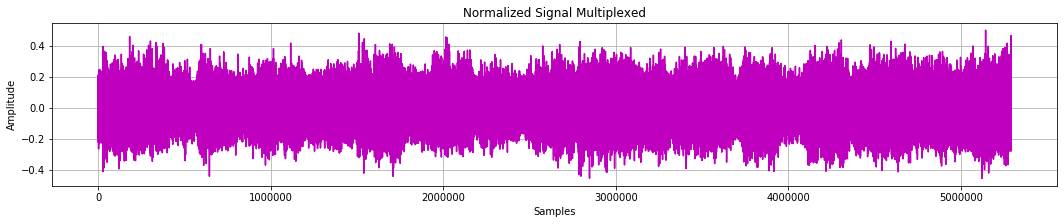

In [510]:
# Multiplexed signal
signal_multiplexed = np.load('muxedsignals.npy');
samples = signal_multiplexed.size; # number of samples
channels = 12; # Number of channels
bandwidth = 44.1e3; # Hz ... it s the bandwith and sampling frequency on each channel
sr =2*channels*bandwidth; # Hz ... Sampling Rate

y_centerscale = center_scale(signal_multiplexed);

myplot(y_centerscale, title='Normalized Signal Multiplexed',x_axis='Samples', y_axis='Amplitude')

#### 0.1 PSD

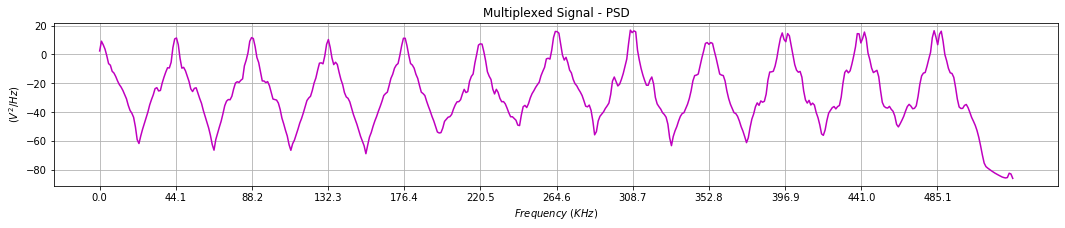

In [511]:
f, Pxx_den = signal.welch(signal_multiplexed, 2*bandwidth*channels, nperseg=1023)

f = f/1e3 # Frequency in KHz

myplot(10*log10((Pxx_den)), 
       x = f, # Freq*1e-3 -> Freq in K Hz 
       title='Multiplexed Signal - PSD',
       x_axis=r'$ Frequency \ (KHz) $', 
       y_axis=r'$ (V^2/Hz)$',
       label = 'Filter')
plt.xticks(1e-3*np.arange(0, sr/2, step=1*bandwidth)); # A grid at 2*bandwidth 

- - -

- - -

- - -

### 1. "Simple" Filtering


#### 1.1 Code for extract **x [k+1]** channel


In [512]:
   def extract_music(x, sr, bandwidth, desired_channel, invert = False, showplot = True, showDSP = False):
## ------------------------------------------------------------------------------------
#     extract_music(x, sr, bandwidth, desired_channel, invert)
#         This function receive a 'signal' multiplexed on time
#         with sampling 'sr' and the channel wich desire extract.
#         Plot the magnitude response in dB x KHz
#         highlight the cuttoff frequencies
# 
#         [in]: 
#             x: original signal;
#             sr: sampling rate of the multiplexed channel;
#             bandwidth: bandwidth of each channel;
#             desired_channel: The number of the channel that you want to play (1 -> N);
#             invert: invert the passing band (if it's on);
#             showplot: Show the plot (if its True) 
#             showDSP: Show the DSP (if its True)
# 
#         [out]: 
#             y_desired_channel: The signal in the channel that you want to play;
#             my_filter: Filter to extract a channel
#             sound:The audioplayer from Ipython display
#
#         Example:
#             signal_desired, channel_baseband, myfilter = extract_music(multiplexed_signal, sr, bandwidth, 1)
## ------------------------------------------------------------------------------------
    import numpy as np
    import scipy.signal as signal
    import IPython.display as ipd
    
    # Determine the central frequency of a channel
    k = desired_channel - 1;

    # Remez Filter Specs
    att = 187; # dB Attenuation
    fc1, fc2 = bandwidth*(k-0.5), bandwidth*(k+0.5); # Cutoff frequencies
    ntaps, beta = signal.kaiserord(att, (fc2-fc1)/(sr/2)); # number of coeffs, Bessel's parameter
    if ntaps%2 == 0:
        ntaps += 1
    
    # debug area 
#     print(ntaps) # 301 coeffs
        
    # 1st channel
    if desired_channel == 1:
        fc1=0;
        if invert is True: # HPF - invert is True
            my_filter = signal.firwin(ntaps, fc2, window=('kaiser',beta), 
                                      scale=False, nyq=sr/2, pass_zero='highpass');
        else: # Default -> LPF - invert different of True
            my_filter = signal.firwin(ntaps, fc2, window=('kaiser',beta), 
                                      scale=False, nyq=sr/2, pass_zero='lowpass');

    # Any channel, except 1st
    else:
        if invert is True: # BSF - invert is True
            my_filter = signal.firwin(ntaps, [fc1,fc2], window=('kaiser',beta), 
                                      scale=False, nyq=sr/2, pass_zero='bandstop');
        else: # Default -> BPF - invert different of True
            my_filter = signal.firwin(ntaps, [fc1,fc2], window=('kaiser',beta), 
                                      scale=False, nyq=sr/2, pass_zero='bandpass');

    # Filtering Bloc
    signal_desired = np.convolve(x, my_filter); # Convolving the singal with filter
    signal_desired = signal_desired[ntaps-1:x.size+ntaps-1:] # Taking count the group delay
    
    w, H = signal.freqz(my_filter); # Filter's parameters

    # Downsampling the extracted_channel
    channel_baseband = signal_desired[::24]; 
    
    # Show plot
    if showplot is True:
        # Plot Definitions
        f = ((sr/2)*w)/(1e3*np.pi)
        myplot(20*np.log10(np.abs(H)), 
                   x = f, # Norm Freq*(Sr/2)*1e-3 -> Freq in K Hz 
                   title='Parameters in Channel {}'.format(desired_channel),
                   x_axis=r'$ Frequency \ (KHz) $', 
                   y_axis=r'$dB$',
                   label = 'Filter')

        if showDSP is True:
            _, Pxx_den = signal.welch(x, 2*bandwidth*channels, nperseg=1023)
            _, Pxx_den2 = signal.welch(signal_desired, 2*bandwidth*channels, nperseg=1023)
            plt.plot(f, 10 * np.log10((Pxx_den)), label='Original')
            plt.plot(f, 10 * np.log10((Pxx_den2)), label='Extracted Channel')
        
        plt.xticks(1e-3*np.arange(0, sr/2, step=2*bandwidth))# A grid at 2*bandwidth 
        xcoords, colors = [fc1/1e3, fc2/1e3], 2*['r']; # x coordinates and colors for the vertical lines

        for (xc, c) in zip(xcoords, colors):
            plt.axvline(x=xc, label='Cutoff Frequency = {} KHz'.format(xc), color=c, linestyle=':')
        if desired_channel <= 8:
            plt.legend(loc='lower right')
        else:
            plt.legend(loc='lower left')
        
        plt.show()    
    
    # Don t show plot
    return signal_desired, channel_baseband, my_filter

#### 1.2 Code for extract and play the music from **x [k+1]** channel



In [513]:
def play_channel(x, desired_channel, bandwidth = 44.1e3):
## ------------------------------------------------------------------------------------
#     play_channel(desired_channel)
#         Uses 'extract_music' to extract and it returns the audio
#         [in]: desired_channel: The number of the channel that you want to play (1 -> N);
#         [out]: sound:The audioplayer from Ipython display
#         Example:
#             play_channel(desired_channel=7)
## ------------------------------------------------------------------------------------

    # Uses 'extract_music' to extract only and the signal in baseband
    _, channel_baseband, _ = extract_music(x, sr, bandwidth, desired_channel, showDSP=True)

    # Play the music
    return ipd.Audio(channel_baseband,rate=bandwidth)

If we have **L as bandwidth**, k as an integer that $ 1 \leq k \leq 11 $, the cutoff frequencies $f_{c1}$ and $f_{c2}$ will be:
\begin{equation}
    f_{c1} = L(k-1) + \dfrac{L}{2} \rightarrow L(k - 0.5)\\
    f_{c2} = L(k) + \dfrac{L}{2} \rightarrow L(k + 0.5)
\end{equation}

Except for the 1st channel, $ k = 0 $, in that case, the first "cuttoff frequency" is zero, instead using a Band Pass Filter (BPF), it will use a Low Pass Filter (LPF).

#### 1.3 Examples

#### 1st Channel

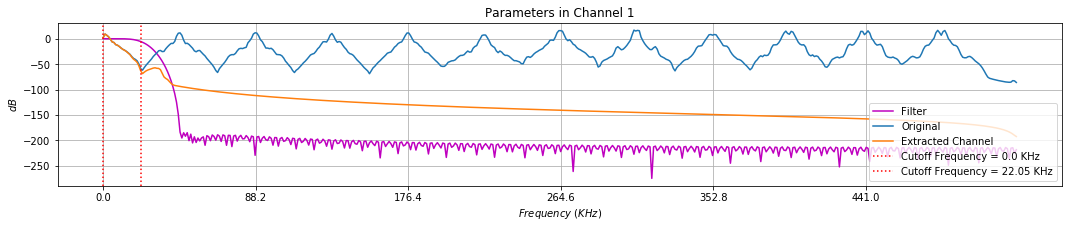

In [514]:
play_channel(signal_multiplexed, desired_channel=1)

#### 7th Channel

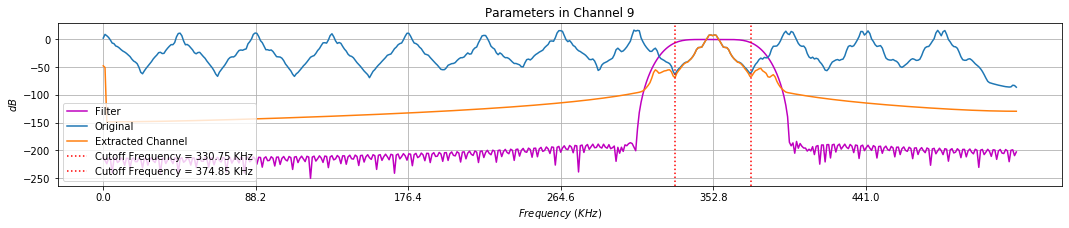

In [515]:
play_channel(signal_multiplexed, desired_channel=9)

- - -

- - -

- - -

## 2. Polyphase Filtering

In [516]:
# https://www.dsprelated.com/showarticle/191.php
def filter_bank(h,M):
## ------------------------------------------------------------------------------------
#     filter_bank(h,M):
#         This function receive the parameters to create a bank filter
# 
#         [in]: 
#             h: Paremeter of a filter;
#             M: 2*channels;
#         [out]: 
#             E: A bank ready to receive the coeffs of a polyphase filter;
## ------------------------------------------------------------------------------------
    E = np.zeros([M, int(np.ceil((len(h)-1)/M))]) # Creates the bank
    
    # Loop for fill the bank
    for ii in range(M):
        for l in range(1 + int((len(h) - 1 - ii)/M)):
            E[ii,l] = h[M*l + ii]
    
    return E

In [517]:
def polyphase_filter(x,h,M):
## ------------------------------------------------------------------------------------
#     polyphase_filter(x,h,M):
#         This function receive fill the bank filter created previously
# 
#         [in]: 
#             x: Signal to filter
#             h: Paremeter of a filter;
#             M: 2*channels;
#         [out]: 
#             x_filtered: The signal filtered by the filter bank;
## ------------------------------------------------------------------------------------
    # Creates the Polyphasefilter
    E = filter_bank(h,M)
    
    # It adjusts the signal to be filtered
    x = np.concatenate((np.zeros(M),x,np.zeros(M)))
    x_filtered = np.zeros(int(np.ceil(len(x)/M))-1 + E.shape[1] - 1)
    
    # Actualy filtering
    for ii in range(0,M):
        x_filtered = x_filtered + np.convolve(E[ii][::],x[M-ii:(len(x)-ii):M])
    return x_filtered


In [518]:
def extract_music_polyphase(x, sr, bandwidth, desired_channel, invert = False):
## ------------------------------------------------------------------------------------
# 
#     Has the same function of extract_music, but instead the traditional filtering, it uses polyphase filters
# 
## ------------------------------------------------------------------------------------
    
    # Uses the extract_music to create the filter
    _, _, my_filter = extract_music(x, sr, bandwidth, desired_channel, invert = invert, showplot = True)
    
    # Uses the filter parameter to create and use the polyphase filter
    signal_base_band = polyphase_filter(x, my_filter, 2*channels)
    
    return signal_base_band

#### 2.1 Example

#### 12th channel

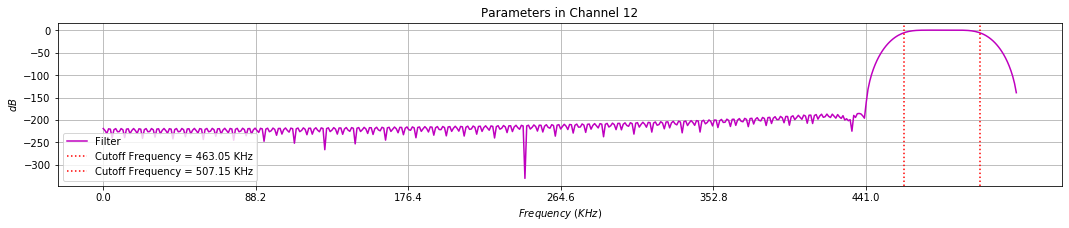

In [519]:
i=12
y_canal_base_band = extract_music_polyphase(signal_multiplexed, sr, bandwidth, desired_channel=i)
ipd.Audio(y_canal_base_band, rate=bandwidth)

- - -

- - -

- - -

## 3. Une instruction qui "joue'' la musique du canal k (+1)



In [520]:
def play_channel_polyphase(x, desired_channel, bandwidth = 44.1e3):
## ------------------------------------------------------------------------------------
#     play_channel(desired_channel)
#         Uses 'extract_music' to extract and it returns the audio
#         [in]: desired_channel: The number of the channel that you want to play (1 -> N);
#         [out]: sound:The audioplayer from Ipython display
#         Example:
#             play_channel(desired_channel=7)
## ------------------------------------------------------------------------------------

    # Uses 'extract_music' to extract only and the signal in baseband
    y_canal_base_band = extract_music_polyphase(x, sr, bandwidth, desired_channel)

    # Play the music
    return ipd.Audio(y_canal_base_band,rate=bandwidth)

#### 3.1 Example

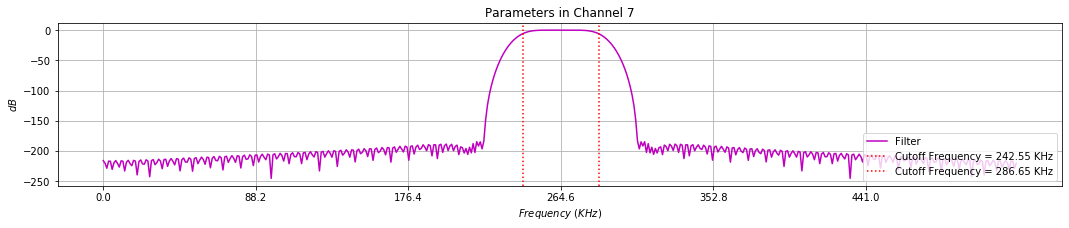

In [521]:
play_channel_polyphase(signal_multiplexed, desired_channel=7)

- - -

- - -

- - -

## 4. le morceau de code qui démodule et "joue'' la musique du canal 10 (+ 1)


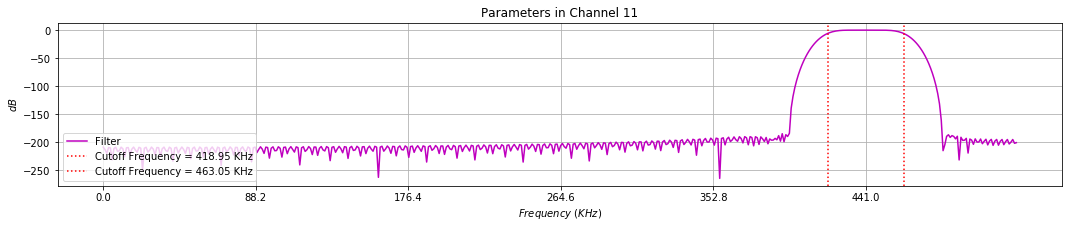

In [522]:
play_channel_polyphase(signal_multiplexed, desired_channel=11)

- - -

- - -

- - -

## 5. le code qui échange les canaux k (+1) et 10 (+1). 

In [523]:
def swap_PQ(x, P, Q, channels):
    
    
    
    
    
    # Extracting, upsampling and adjusting the signal of the channel P
    CHANNEL_P = extract_music_polyphase(x, sr, bandwidth, desired_channel = P)
    UP_CHANNEL_P = upsampling(CHANNEL_P, channels ,x.size)
    FILTERED_P, _, _ = extract_music(UP_CHANNEL_P,sr, bandwidth, desired_channel = Q)
    NOT_P, _, _ = extract_music(UP_CHANNEL_P, sr, bandwidth, desired_channel = P, invert = True)
    
    # Extracting, upsampling and adjusting the signal of the channel Q
    CHANNEL_Q = extract_music_polyphase(x, sr, bandwidth, desired_channel = Q)
    UP_CHANNEL_Q = upsampling(CHANNEL_Q, channels ,x.size)
    FILTERED_Q, _, _ = extract_music(UP_CHANNEL_Q,sr, bandwidth, desired_channel = P)    
    NOT_PQ, _, _ = extract_music(NOT_P, sr, bandwidth, desired_channel = Q, invert = True)
        
    # Adjust the length of arrays, to operate them, they need to be with the same length 
    adjust_length  = np.min([FILTERED_P.size,FILTERED_Q.size,NOT_PQ.size])
    
    # Reconstructing the signal swaping the channels
    NOT_PQ[0:adjust_length] += FILTERED_Q[0:adjust_length]
    NOT_PQ[0:adjust_length] += FILTERED_P[0:adjust_length]
    
    # Swapped Signal
    NOT_PQ = NOT_PQ[0:adjust_length]
    
    return NOT_PQ

#### Modulo9 Function (Birthday: 16th June)

In [524]:
print( 'Channel: ', mod9_odd(16), '(+ 1)' )
desired_channel =  mod9_odd(16) + 1;

Channel:  7 (+ 1)


#### Swap Channels: 8 and 11 

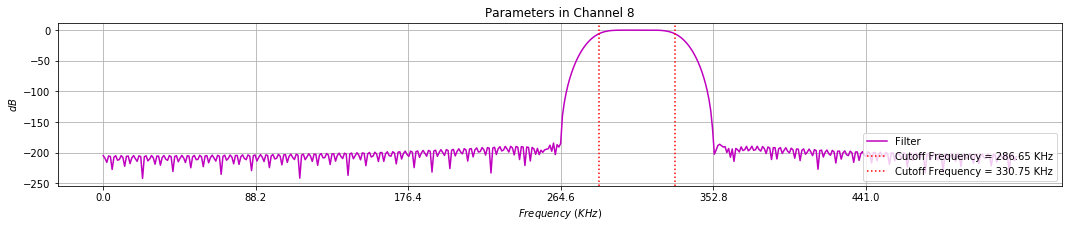

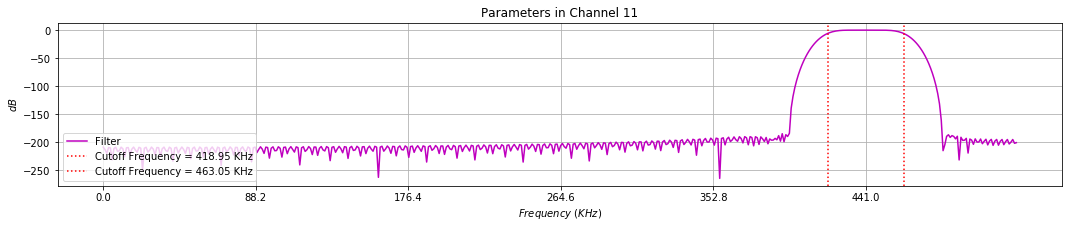

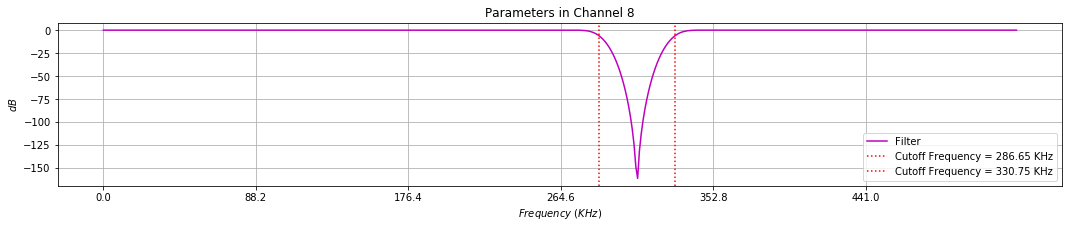

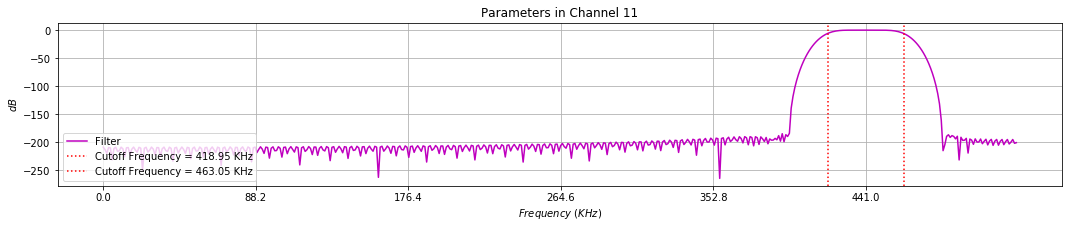

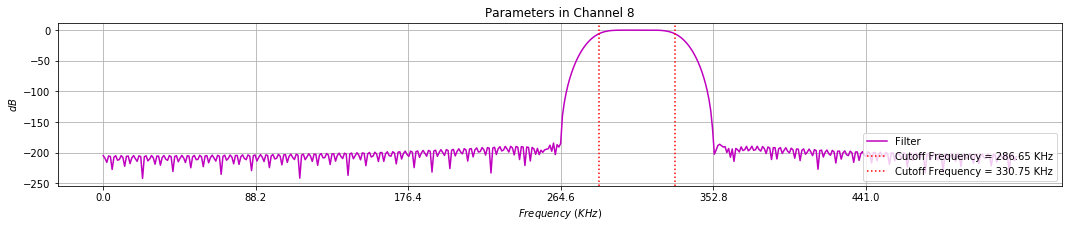

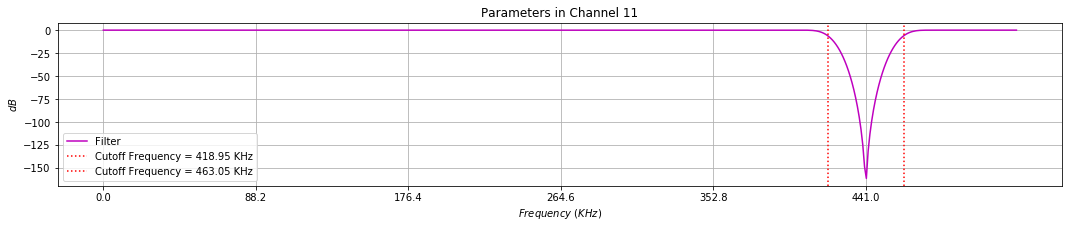

In [525]:
P, Q = 8, 11


Swap_8and11 = swap_PQ(signal_multiplexed, P, Q, channels)

- - -
### Previosly Channel 8 - Now it's Channel 11 

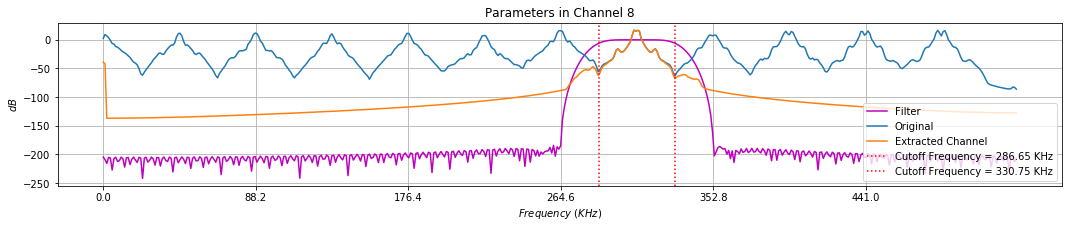

In [526]:
play_channel(signal_multiplexed, desired_channel=8)

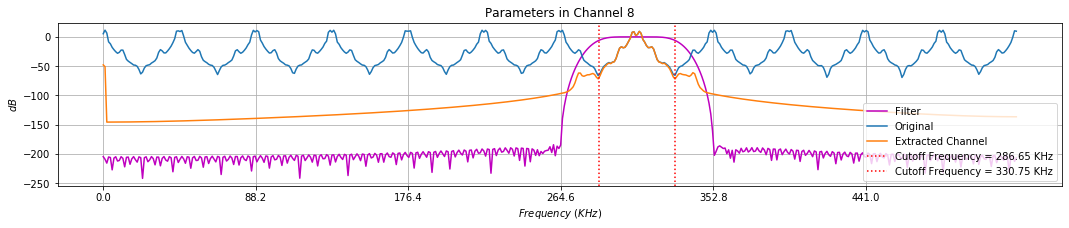

In [527]:
play_channel(Swap_8and11, desired_channel=8)

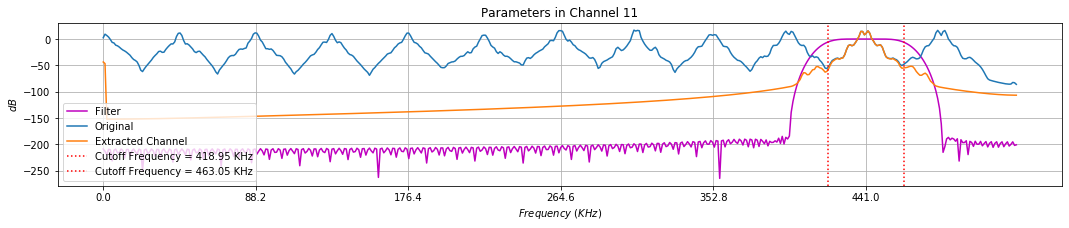

In [528]:
play_channel(signal_multiplexed, desired_channel=11)

- - -
### Previosly Channel 11 - Now it's Channel 8

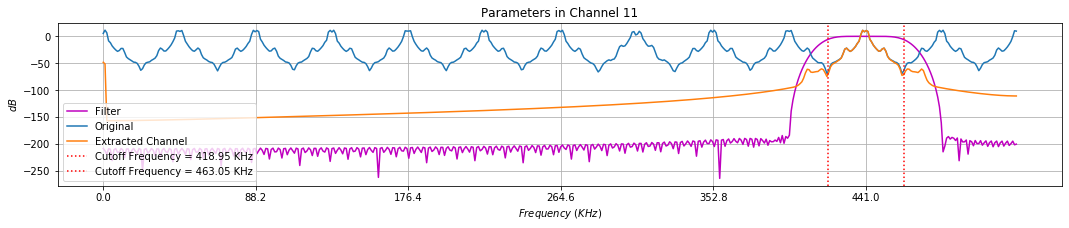

In [529]:
play_channel(Swap_8and11, desired_channel=11)